### Marketing Analytics - RFM Customer Segmentation with K Means

RFM features of customers:

- The more __recent__ they purchase, the more responsive they are to the promotions.
- The more __frequent__ they purchase, the more engaged and satisfied they are.
- The more __monetary__ value helps to differentiate high spenders vs low spenders.

In [1]:
import pandas as pd
%pylab inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data= pd.read_csv('data_feature_eng.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,-17.851690,-41.493610,teofilo otoni,MG,af74cc53dcffc8384b29e7abfa41902b,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP,-23.190244,-47.291571,salto,SP,home_construction,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,7e2ca73af071679902a9ba14d7c3cee8,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,2018-06-12 14:15:00,2018-06-18 16:41:04,2018-07-04 00:00:00,5f65ad4b5147b940da2da6802f18bbf7,4,NaN,NaN,2018-06-19 00:00:00,2018-06-19 20:20:45,55020cb68ae358a51969695657a54e9c,15520,valentim gentil,SP,-20.421158,-50.086044,valentim gentil,SP,2233b59e8cf2817f9659e52cce3093de,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,1,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,24.03,3370,sao paulo,SP,-23.567995,-46.557625,sao paulo,SP,home_construction,2018,6,Jun,201806,20180611,11,0,Mon,14,Afternoon
2,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,2a44b3dbad360783fd663c15c3e6367c,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,2018-02-16 22:38:59,2018-03-02 22:29:04,2018-03-08 00:00:00,fad89f16742c04dcdfec38fd6c115561,4,NaN,"Otimo produto recebir no prazo certo,recomento",2018-03-03 00:00:00,2018-03-04 20:25:59,aca152a8bcfa7d7059b7787c67d60d52,13295,itupeva,SP,-23.159152,-47.058208,itupeva,SP,679a3e5e1d2bb68982be5734c6e55e63,57.0,565.0,4.0,800.0,38.0,38.0,22.0,1,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,12.72,3187,sao paulo,SP,-23.566231,-46.580203,sao paulo,SP,home_construction,2018,2,Feb,201802,20180215,15,3,Thu,13,Afternoon
3,1fce50c1831b6809773e5020edc716e2,1,credit_card,2,36.16,1ddcc619647ca008fdc24f8302c8573f,delivered,2018-07-24 20:08:54,2018-07-25 20:05:09,2018-07-26 16:04:00,2018-07-30 17:20:59,2018-08-07 00:00:00,bc0fa803dc47267d440652c24692784d,3,NaN,NaN,2018-07-31 00:00:00,2018-08-01 09:12:07,9aa679326b151fc564c2a238f361aa7d,5678,sao paulo,SP,-23.597505,-46.704756,sao paulo,SP,cce794ab6b84d0345332bb1910f9eb20,60.0,843.0,1.0,275.0,20.0,11.0,19.0,1,165b1235e9e9942cb5fae67103576fb0,2018-07-31 20:05:09,21.70,14.46,14020,ribeirao preto,SP,-21.210105,-47.801390,ribeirao preto,SP,home_construction,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
4,107f069fdb62a9cbe252b043323e4e32,1,credit_card,2,175.13,ef0ce737cbf4c0d6aefb7c7281b658e3,delivered,2018-05-18 08:24:28,2018-05-18 08:55:36,2018-05-24 09:45:00,2018-06-12 18:18:45,2018-06-07 00:00:00,4d18eb591789b7687cf69ad6d6d4485c,5,Não recebi,Nã

In [4]:
features = ['order_id', 'order_status', 'order_purchase_timestamp','price','freight_value',
       'payment_value', 'customer_unique_id', 'zip_code_prefix_customer','order_item_id','product_category_name',
       'customer_city', 'customer_state','order_purchase_date','order_delivered_customer_date']
Olist_db = data[features]
Olist_db.shape

(116581, 14)

In [5]:
Olist_db.head()

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,product_category_name,customer_city,customer_state,order_purchase_date,order_delivered_customer_date
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,79.80,19.53,99.33,708ab75d2a007f0564aedd11139c7708,39801,1,home_construction,teofilo otoni,MG,20180425,2018-05-09 17:36:51
1,b545ba7b0bd67a3128185c7214704319,delivered,2018-06-11 14:59:24,316.05,24.03,340.08,55020cb68ae358a51969695657a54e9c,15520,1,home_construction,valentim gentil,SP,20180611,2018-06-18 16:41:04
2,6a26bd1a037993f1205073dbeda67db4,delivered,2018-02-15 13:53:42,54.40,12.72,67.12,aca152a8bcfa7d7059b7787c67d60d52,13295,1,home_construction,itupeva,SP,20180215,2018-03-02 22:29:04
3,1fce50c1831b6809773e5020edc716e2,delivered,2018-07-24 20:08:54,21.70,14.46,36.16,9aa679326b151fc564c2a238f361aa7d,5678,1,home_construction,sao paulo,SP,20180724,2018-07-30 17:20:59
4,107f069fdb62a9cbe252b043323e4e32,delivered,2018-05-18 08:24:28,156.45,18.68,175.13,2acd1014f0a4e286b0896f30b67c1e80,79010,1,home_construction,campo grande,MS,20180518,2018-06-12 18:18:45


In [6]:
#Olist_db["order_purchase_timestamp"] = pd.to_datetime(Olist_db["order_purchase_timestamp"])

In [7]:
Olist_db.describe()

,price,freight_value,payment_value,zip_code_prefix_customer,order_item_id,order_purchase_date
count,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,1.165810e+05
mean,120.751369,20.062550,172.910258,35053.391556,1.196953,2.017601e+07
std,183.848421,15.845515,267.622516,29817.864821,0.701350,4.880262e+03
min,0.850000,0.000000,0.000000,1003.000000,1.000000,2.016090e+07
25%,39.900000,13.080000,61.000000,11310.000000,1.000000,2.017091e+07
50%,74.900000,16.320000,108.190000,24315.000000,1.000000,2.018012e+07
75%,134.900000,21.220000,189.720000,58600.000000,1.000000,2.018050e+07
max,6735.000000,409.680000,13664.080000,99980.000000,21.000000,2.018090e+07


In [8]:
cond = Olist_db["order_status"] == "delivered"
Olist_db = Olist_db.loc[cond]

In [9]:
Olist_db.shape

(114067, 14)

In [10]:
Olist_db.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
price                            0
freight_value                    0
payment_value                    0
customer_unique_id               0
zip_code_prefix_customer         0
order_item_id                    0
product_category_name            0
customer_city                    0
customer_state                   0
order_purchase_date              0
order_delivered_customer_date    8
dtype: int64

In [11]:
Olist_db= Olist_db.dropna()

### Removing outliers

In [12]:
out= Olist_db[Olist_db['price']>= 3000]
out

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,product_category_name,customer_city,customer_state,order_purchase_date,order_delivered_customer_date
23728,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,6735.00,194.31,6929.31,dc4802a71eae9be1dd28f5d788ceb526,79042,1,housewares,campo grande,MS,20170212,2017-03-03 14:23:18
28179,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,6499.00,227.66,6726.66,ff4159b92c40ebe40454e3e6a7c35ed6,17506,1,art,marilia,SP,20170524,2017-06-05 17:09:48
34700,a53e05ecd2ed1f46a2b8e1f5828be7c6,delivered,2018-01-26 14:30:21,3690.00,136.80,3826.80,bc5e25094a7d51b6aee35236572e64f4,35660,1,sports_leisure,para de minas,MG,20180126,2018-02-02 13:53:10
35238,94fca82966c05ba707f4e7dc0c50aa3c,delivered,2018-08-15 17:00:49,3099.00,252.35,3351.35,ce3fe361f9e68bf0a813baaae1334d01,30180,1,sports_leisure,belo horizonte,MG,20180815,2018-08-21 00:16:33
36387,b239ca7cd485940b31882363b52e6674,delivered,2018-07-29 08:39:48,4059.00,104.51,4163.51,ca27f3dac28fb1063faddd424c9d95fa,34018,1,sports_leisure,nova lima,MG,20180729,2018-07-31 23:03:28
37508,41b7766bb1df487d17fb9725b78ff509,delivered,2018-05-14 15:15:30,3930.00,49.55,3979.55,f0767ae738c3d90e7b737d7b8b8bb4d1,20081,1,garden_tools,rio de janeiro,RJ,20180514,2018-06-01 20:32:00
39206,1d54db601b417ccdfd3b7071955e6cc7,delivered,2018-04-27 05:57:39,3105.00,104.72,3209.72,bbeb907759ef5fc169099af3c88d535d,89113,1,garden_tools,gaspar,SC,20180427,2018-05-03 23:52:04
46362,53c71d3953507c6239ff73917ed358c9,delivered,2018-07-24 20:41:01,3109.99,74.35,3184.34,46450c74a0d8c5ca9395da1daac6c120,88034,1,cool_stuff,florianopolis,SC,20180724,2018-08-02 18:41:16
50520,d3f66901a6743e15f9311547cc623b91,delivered,2018-03-21 15:06:34,3700.00,92.59,3792.59,3fec1a05177762f279472253113d568a,50050,1,watches_gifts,recife,PE,20180321,2018-04-02 23:33:33
52391,86c4eab1571921a6a6e248ed312f5a5a,delivered,2017-03-18 20:08:04,3999.90,17.01,4016.91,011875f0176909c5cf0b14a9138bb691,4559,1,watches_gifts,sao paulo,SP,20170318,2017-03-24 07:47:55


In [13]:
Olist_db=Olist_db[Olist_db['price']<= 3000]

In [14]:
#out= Olist_db[Olist_db['freight_value']>= 100]
#out

In [15]:
#Olist_db= Olist_db[Olist_db['freight_value']<= 100]


In [16]:
Olist_db.shape

(114032, 14)

In [699]:
Q1 = Olist_db.quantile(q=.25)
Q3 = Olist_db.quantile(q=.75)
IQR=Q3-Q1

outliers= (Olist_db < (Q1-1.5*IQR)) | (Olist_db > (Q3+1.5*IQR))
outliers.sum()

customer_city                        0
customer_state                       0
customer_unique_id                   0
freight_value                    12499
order_delivered_customer_date        0
order_id                             0
order_item_id                    14461
order_purchase_date                  0
order_purchase_timestamp             0
order_status                         0
payment_value                     9330
price                             8693
product_category_name                0
zip_code_prefix_customer             0
dtype: int64

In [522]:
Olist_db = Olist_db[~((Olist_db < (Q1-1.5*IQR)) | (Olist_db > (Q3+1.5*IQR))).any(axis=1)]
Olist_db.shape

(82970, 12)

### Création features

SEGMENTATION= Trouvez des clients interéssés par le prix des produits le prix des livraisons ou les produits en vue de faire des offres personnelles sur les clients plus intéressés par le prix des produits faire des pub cible le prix des livraisons faire des promos sur la livraison ou les produits les proposer le meilleurproduit -rfm

__Total puchase__

In [17]:
#le prix qu'un client paye lors de sa commande 
Olist_db['Montant_achat']=(Olist_db['price']*Olist_db['order_item_id'])+(Olist_db['freight_value']*Olist_db['order_item_id'])

__Delivery price__

In [18]:
#le prix de la livraison que le client paye 
Olist_db['Prix_Livraison']=(Olist_db['freight_value']*Olist_db['order_item_id'])

__product price__

In [19]:
#le prix que le client paye avec  le nombre de produits quil a commande 
Olist_db['Prix_produit']=(Olist_db['price']*Olist_db['order_item_id'])

### Transformation des types

In [20]:
Olist_db['order_purchase_timestamp']=pd.to_datetime(Olist_db['order_purchase_timestamp'])

In [21]:
Olist_db['order_delivered_customer_date']=pd.to_datetime(Olist_db['order_delivered_customer_date'])

In [22]:
Olist_db['Durée_livraison']=Olist_db['order_delivered_customer_date']-Olist_db['order_purchase_timestamp']

In [23]:
Olist_db['Durée_livraison']=Olist_db['Durée_livraison'].apply(lambda x: x.days)
#data['Durée_livraison'].dt.days on peut utiliser cette technique

### To calculate RFM

In [24]:
import datetime as dt

In [25]:
# Make the date_placed column datetime
Olist_db['order_purchase_timestamp'] = pd.to_datetime(Olist_db['order_purchase_timestamp'])

In [26]:
Olist_db['order_purchase_date'].max()

20180829

In [27]:
NOW = dt.datetime(2018,8,30)

rfmTable = Olist_db.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: ((NOW - x.max()).days)+1 , # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'Montant_achat': lambda x: x.sum()}).reset_index() # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'Montant_achat': 'Monetary'}, inplace=True)

Customer '0000366f3b9a7992bf8c76cfdf3221e2' has frequency:1, monetary value:$141.90 and recency:112 days.

In [28]:
rfmTable.describe()

,Recency,Frequency,Monetary
count,92047.000000,92047.000000,92047.000000
mean,237.802231,1.238845,196.515792
std,152.566068,0.847765,424.488555
min,1.000000,1.000000,10.070000
25%,114.000000,1.000000,64.510000
50%,219.000000,1.000000,113.800000
75%,346.000000,1.000000,200.970000
max,696.000000,75.000000,61488.360000


In [29]:
test = rfmTable[rfmTable['customer_unique_id']=='0000f6ccb0745a6a4b88665a16c9f078']
test

,customer_unique_id,Recency,Frequency,Monetary
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62


In [30]:
rfmTable['Recency'].min()

1

Inserting the date of purchase and comparing it to the number of days in the rfmTable we verify our RFM table is correct.

In [31]:
((NOW - dt.datetime(2017,10,12)).days) == 322

True

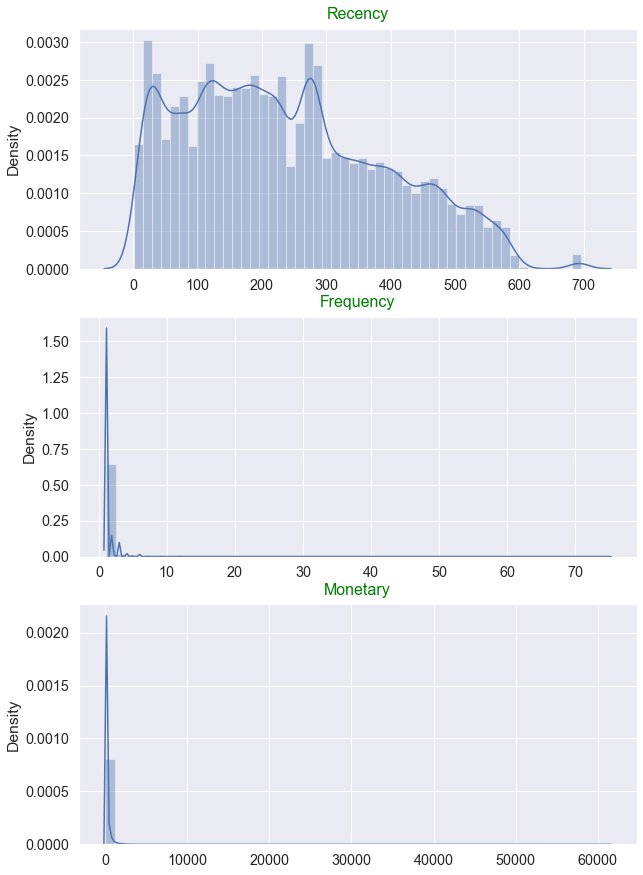

In [32]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,15))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfmTable['Recency'])
plt.xlabel("")
plt.title('Recency', size=16, color='green', pad=10)

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfmTable['Frequency'])
plt.xlabel("")
plt.title('Frequency', size=16, color='green', pad=10)

# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfmTable['Monetary'])
plt.xlabel("")
plt.title('Monetary', size=16, color='green', pad=10)

plt.savefig("RFM_dist.png")

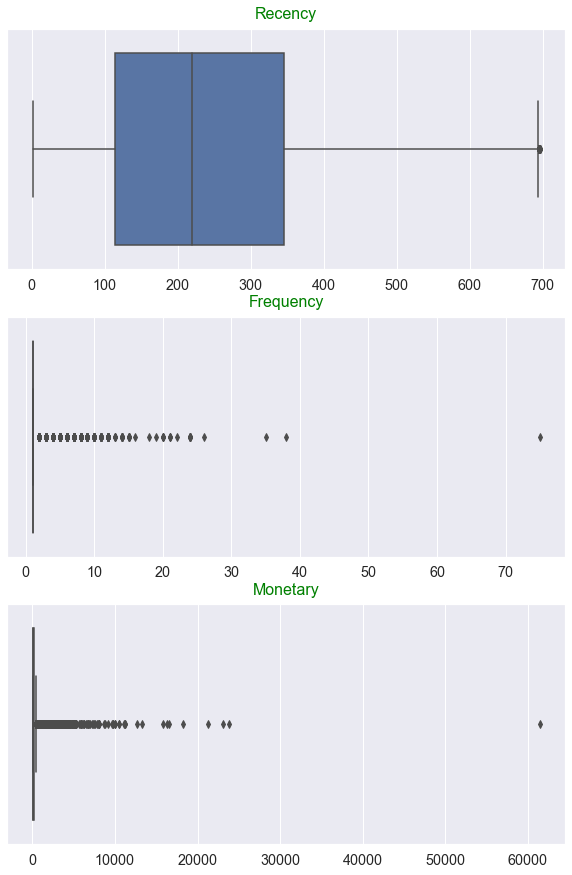

In [33]:
plt.figure(figsize=(10,15))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.boxplot(rfmTable['Recency'])
plt.xlabel("")
plt.title('Recency', size=16, color='green', pad=10)

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.boxplot(rfmTable['Frequency'])
plt.xlabel("")
plt.title('Frequency', size=16, color='green', pad=10)

# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.boxplot(rfmTable['Monetary'])
plt.xlabel("")
plt.title('Monetary', size=16, color='green', pad=10)

plt.savefig("RFM_box.png")

### Determining RFM Quartiles

In [34]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [35]:
quantiles

,Recency,Frequency,Monetary
0.25,114.0,1.0,64.51
0.50,219.0,1.0,113.80
0.75,346.0,1.0,200.97


Send quantiles to a dictionary, easier to use.

In [36]:
quantiles = quantiles.to_dict()

In [37]:
quantiles

{'Recency': {0.25: 114.0, 0.5: 219.0, 0.75: 346.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 64.51, 0.5: 113.80000000000001, 0.75: 200.96999999999997}}

### Creating the RFM segmentation table

In [38]:
rfmSegmentation = rfmTable

In [39]:
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [40]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [41]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [42]:
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342


In [43]:
# Count num of unique segments
rfm_count_unique = rfmSegmentation.groupby('RFMClass')['RFMClass'].nunique()
print(rfm_count_unique.sum())

32


In [44]:
rfmSegmentation['RFM_Score'] = rfmSegmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244,10
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443,11
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344,11
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342,9


In [45]:
#rfmSegmentation[rfmSegmentation['RFMClass']== '434']

to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

It is helpful to assign names to segments of interest. Here are just a few examples to illustrate:

- __Best Customers__ – This group consists of those customers who are found in __R-Tier-1, F-Tier-1 and M-Tier-1__, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 1-1-1; we’ll use this notation going forward.

- __Regular Customers__ – This group consists of those customers in __2-3-1 and 3-4-2__. These are customers who are not in other groups.

- __Loyal Customers__ – This group consists of those customers in segments __1-1-3 and 1-1-4__ (they transacted recently and do so often, but spend the least).

- __Churned Best Customers__ – This segment consists of those customers in groups __4-1-1, 4-1-2, 4-2-1 and 4-2-2__ (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).

- __Lost customers__ –The customers who were not spending so much and were absent for a long time __4-4-4, 4-3-4__.

Marketers should assemble groups of customers most relevant for their particular business objectives and retention goals.

|Recency                |	|Frequency                      |	|Monetary                |
|-----------------------|   |-------------------------------|   |------------------------|
|R-Tier-1 (most recent) |	|F-Tier-1 (most frequent)       |	|M-Tier-1 (highest spend)|
|R-Tier-2               |	|F-Tier-2                       |	|M-Tier-2                |
|R-Tier-3               |	|F-Tier-3                       |	|M-Tier-3                |
|R-Tier-4 (least recent)|	|F-Tier-4 (only one transaction)|	|M-Tier-4 (lowest spend) |

In [46]:
# Define rfm_level function 
def rfm_level(df):
    if (df['M_Quartile'] == 1) & (df['RFM_Score'] <= 4):
        return 'Best Customers' 
    
    elif (((df['R_Quartile'] == 1) & (df['RFM_Score'] >= 5))| (df['RFMClass'] == 121)):
        return 'Loyal Customers'
    
    elif ((df['RFM_Score'] <= 8) & (df['R_Quartile'] == 4)| (df['RFM_Score'] <= 6) & (df['R_Quartile'] == 3)):
        return 'Churned Best Customers'
    
    elif ((df['M_Quartile'] == 4) & (df['R_Quartile'] == 4) & (df['RFM_Score'] >= 11)):
        return 'Lost Customers'
    
    else:
        return 'Regular Customers'

In [47]:
# Define rfm marketing action function
def rfm_action(df):
    if (df['M_Quartile'] == 1) & (df['RFM_Score'] <= 4):
        return 'Upsell most expensive items'
    
    elif (((df['R_Quartile'] == 1) & (df['RFM_Score'] >= 5))| (df['RFMClass'] == 121)):
        return 'Loyality programs;Cross Sell'
    
    elif ((df['RFM_Score'] <= 8) & (df['R_Quartile'] == 4)| (df['RFM_Score'] <= 6) & (df['R_Quartile'] == 3)):
        return 'Cross Sell Recommendations and Discount coupons'
    
    elif ((df['M_Quartile'] == 4) & (df['R_Quartile'] == 4) & (df['RFM_Score'] >= 9)):
        return 'Don\'t spend too much trying to re-acquire'
    
    else:
        return 'Price incentives and Limited time offer'

In [48]:
# Create a new variable RFM_Level
rfmSegmentation['RFMClass'] = rfmSegmentation.RFMClass.apply(lambda x: int(x))
rfmSegmentation['Customer Segment'] = rfmSegmentation.apply(rfm_level, axis=1)

# Create a new variable RFM_Level
rfmSegmentation['Marketing Action'] = rfmSegmentation.apply(rfm_action, axis=1)
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,Customer Segment,Marketing Action
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142,7,Loyal Customers,Loyality programs;Cross Sell
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244,10,Regular Customers,Price incentives and Limited time offer
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443,11,Regular Customers,Price incentives and Limited time offer
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344,11,Regular Customers,Price incentives and Limited time offer
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342,9,Regular Customers,Price incentives and Limited time offer


In [49]:
rfmSegmentation.shape

(92047, 11)

In [50]:
rfmSegmentation['Customer Segment'].value_counts()

Regular Customers         55266
Loyal Customers           20029
Churned Best Customers     6471
Lost Customers             5712
Best Customers             4569
Name: Customer Segment, dtype: int64

### Group Customer by their Customer Segment

In [51]:
#Calculate Average values for each customer segment and return size of each segment
rfm_level_agg = rfmSegmentation.groupby(['Customer Segment']).agg({'Recency': 'mean',
                                                                   'Frequency' : 'mean',
                                                                   'Monetary': ['mean', 'count'],
                                                                   'Marketing Action' : 'unique'}).round(1)
#print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary         \
                          mean      mean     mean  count   
Customer Segment                                           
Best Customers           114.9       2.8    628.4   4569   
Churned Best Customers   368.7       2.6    483.1   6471   
Lost Customers           454.6       1.0     44.3   5712   
Loyal Customers           57.2       1.0    150.8  20029   
Regular Customers        275.7       1.0    159.6  55266   

                                                         Marketing Action  
                                                                   unique  
Customer Segment                                                           
Best Customers                              [Upsell most expensive items]  
Churned Best Customers  [Cross Sell Recommendations and Discount coupons]  
Lost Customers                [Don't spend too much trying to re-acquire]  
Loyal Customers                            [Loyality programs;Cross Sell]  
Regular Customers       [Price incentives and Limited time offer, Don'...

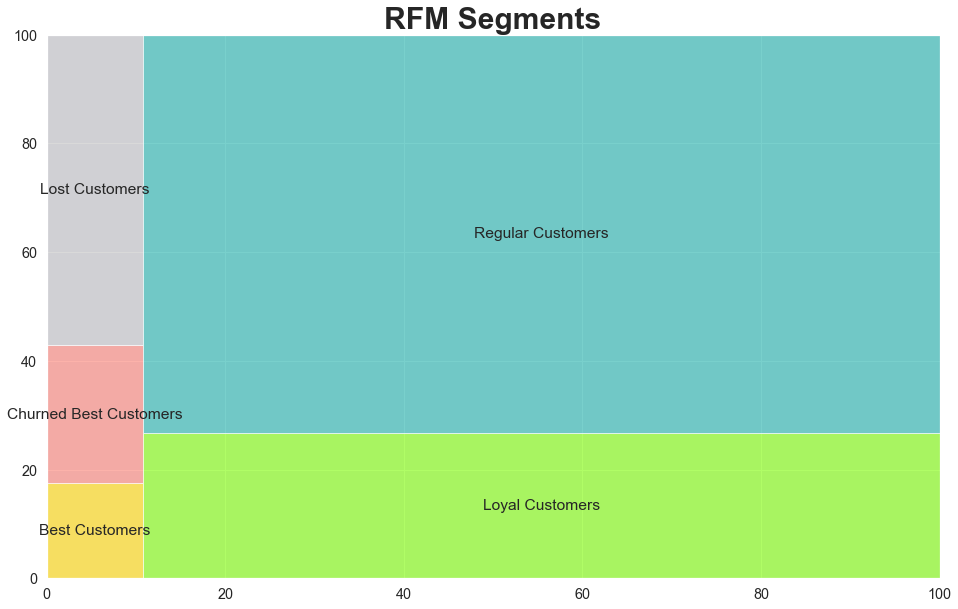

In [213]:
import squarify
sns.set(font_scale=1.3)
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'MarketingAction']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
color = ['gold', 'salmon', 'silver', 'lawngreen', 'lightseagreen']
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Best Customers',
                     'Churned Best Customers',
                     'Lost Customers',
                     'Loyal Customers',
                     'Regular Customers',], alpha=.6,color=color)
plt.title("RFM Segments",fontsize=30,fontweight="bold")
plt.axis('on')
plt.savefig("RFM Segments.png")


- __Best Customers__ - It’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.

- __Churned Best Customers__ — Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let's target them with their wishlist items and a limited time offer discount.

- __Lost Customers__ — Made some initial purchases but have not seen them since. Was it a bad customer experience? Or product-market fit?

- __Loyal Customers__ — These are the most loyal customers. They are active with frequent purchases and high monetary value. They could be the brand evangelists and should focus on serving them well. They could be the best customers to get feedback on any new product launches or be the early adopters or promoters.

- __Regular Customers__ — High potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

### Normalization

In [52]:
rfm_df= rfmTable[['Recency', 'Frequency', 'Monetary']]

In [53]:
rfm_df.min()

Recency       1.00
Frequency     1.00
Monetary     10.07
dtype: float64

In [54]:
from sklearn.preprocessing import StandardScaler

data_log = np.log(rfm_df)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=rfm_df.index, columns=rfm_df.columns)

In [55]:
data_normalized.head()

,Recency,Frequency,Monetary
0,-0.465149,-0.387551,0.182573
1,-0.437110,-0.387551,-1.687847
2,1.199542,-0.387551,-0.381427
3,0.655054,-0.387551,-1.152775
4,0.540361,-0.387551,0.553338


## 2. Clusterring

### 2.1. K-Means Clustering

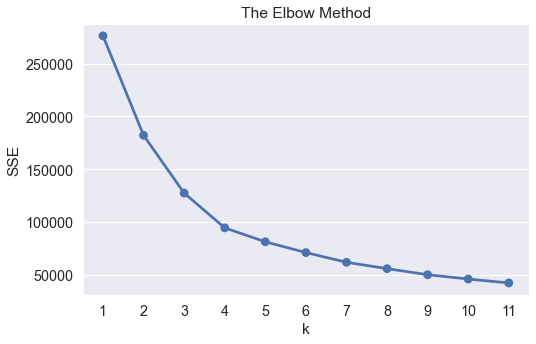

In [56]:
from sklearn.cluster import KMeans
sns.set(font_scale=1.3)
sse = {}
for k in range(1, 12):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(8,5))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.savefig("Elbow.png")

From the above elbow plot, I can deduce that the optimal number of clusters to use is 4 since after that point there is a sharp shift in the steepness of the slope.

In [219]:
kmeans = KMeans(n_clusters = 4, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
rfm_k5 = rfm_df.assign(Cluster=cluster_labels)
grouped = rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0          40.1       1.0     94.6  12365
1         246.9       2.4    225.8   4414
2         282.9       1.0     51.2  29591
3         279.3       1.0    143.4  30322

## Evaluation clustering algorithms

### Yellowbrick — Clustering Evaluation 

In [75]:
! pip install yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


### 2.1.1. K-Elbow Plot

In [57]:
#from sklearn import metrics, cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs

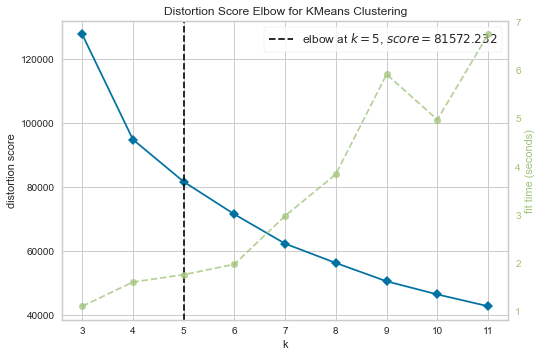

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_normalized)   
visualizer.poof()                 


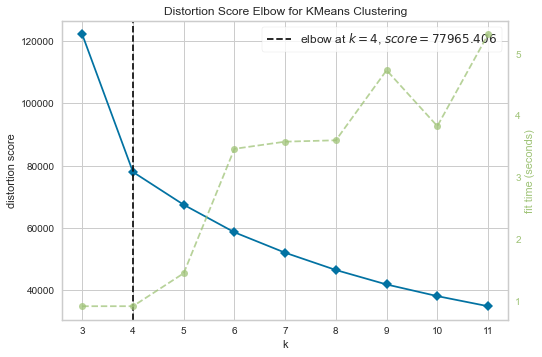

<Figure size 576x396 with 0 Axes>

In [51]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_normalized)   # Fit the data to the visualizer
visualizer.poof()                 # Draw/show/poof the data
plt.savefig("KElbowVisualizer.png")

### 2.1.2. Calinski harabasz plot

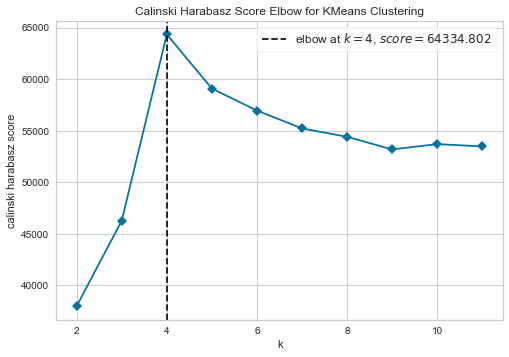

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [52]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(data_normalized)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

### 2.1.4. Silhouette Visualizer

Silhouette analysis can be used to evaluate the density and separation between clusters. The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value. This produces a score between -1 and +1, where scores near +1 indicate high separation and scores near -1 indicate that the samples may have been assigned to the wrong cluster.

The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.
Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

Notice that graph contains homogeneous and long silhouettes. In addition, the vertical red-dotted line on the plot indicates the average silhouette score for all observations.

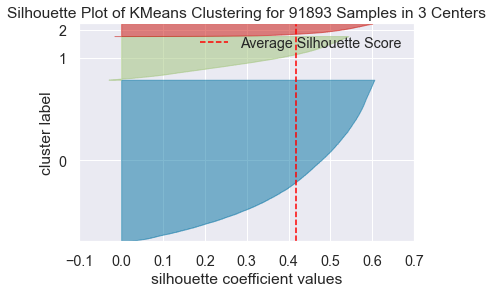

<Figure size 432x288 with 0 Axes>

In [249]:
model = KMeans(3)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_normalized)   
visualizer.poof() 
plt.savefig("SilhouetteVisualizer3.png")

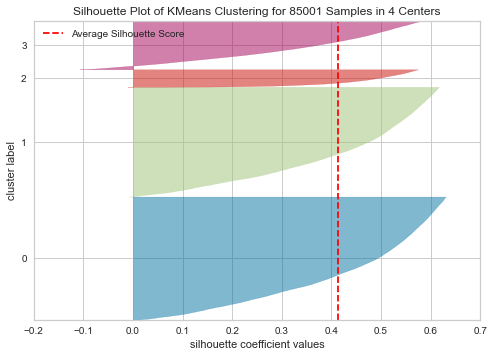

<Figure size 576x396 with 0 Axes>

In [53]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_normalized)   
visualizer.poof() 
plt.savefig("SilhouetteVisualizer4.png")

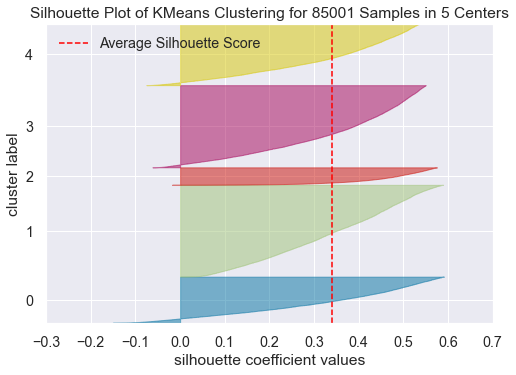

<Figure size 576x396 with 0 Axes>

In [62]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_normalized)   
visualizer.poof() 
plt.savefig("SilhouetteVisualizer5.png")

In [166]:
data_normalized.keys()

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

### 2.2. DBSCAN

density-based spatial clustering of applications with noise

In [60]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [61]:
db = DBSCAN(eps=0.3, min_samples =15).fit(data_normalized)

In [62]:
labels = db.labels_

In [63]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [64]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 9
Estimated no. of noise points: 997


### TSNE

t-distributed stochastic neighbor embedding

In [59]:
from sklearn.manifold import TSNE

In [60]:
tsne_model =TSNE(n_components=2,perplexity=50, random_state= 0)
X_tsne= tsne_model.fit_transform(data_normalized)

In [69]:
my_clust = KMeans(n_clusters=5, random_state=1)
my_clust.fit(data_normalized)
dataModel = rfm_df.assign(Cluster=my_clust.labels_)

In [70]:
dataModel

,Recency,Frequency,Monetary,Cluster
0,112,1,141.90,4
1,115,1,27.19,3
2,538,1,86.22,0
3,322,1,43.62,3
4,289,1,196.89,4
...,...,...,...,...
84996,256,1,73.16,0
84997,263,1,84.58,0
84998,569,1,112.46,0
84999,120,1,133.69,4


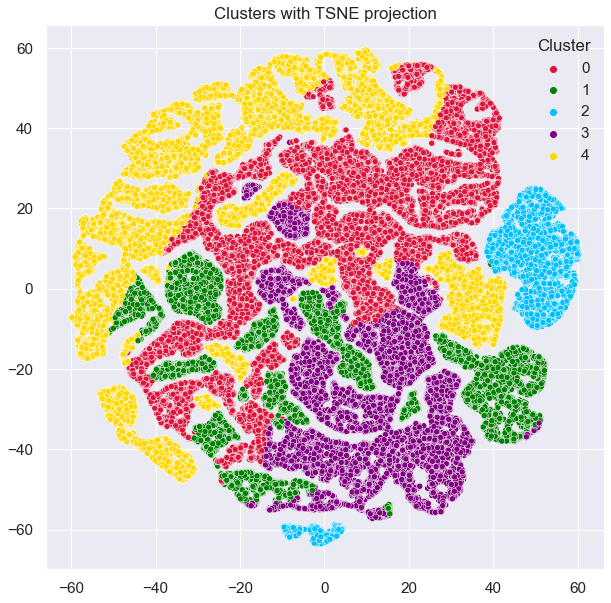

In [71]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel,\
                palette=['crimson','green','deepskyblue','purple','gold'])
plt.title('Clusters with TSNE projection')
plt.savefig("TSNE5.png")

In [407]:
my_clust4 = KMeans(n_clusters=4, random_state=1)
my_clust4.fit(data_normalized)
dataModel4 = rfm_df.assign(Cluster=my_clust4.labels_)

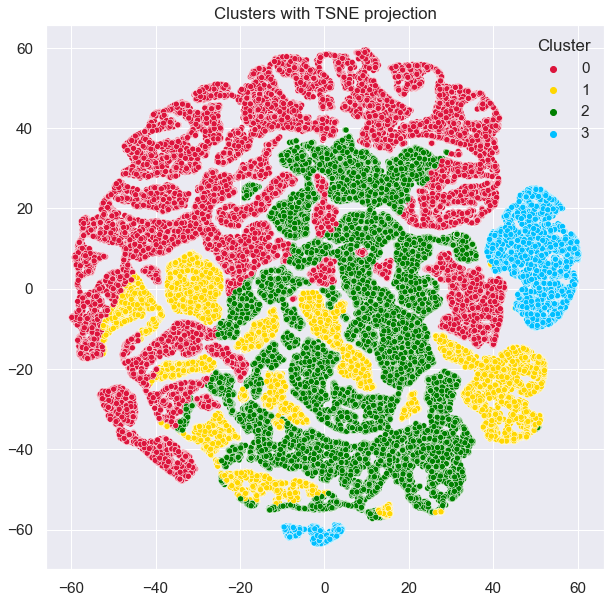

In [74]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel4,\
                palette=['crimson','gold','green','deepskyblue'])
plt.title('Clusters with TSNE projection')
plt.savefig("TSNE4.png")

In [75]:
dataModel4.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(1)
#round permet d'arrondir au virgule
#voir le power point pour l'interpretation

,Recency,Frequency,Monetary
Cluster,,,
0,275.6,1.0,169.0
1,40.0,1.0,112.3
2,281.5,1.0,56.1
3,241.2,2.3,177.8


In [76]:

dataModel4['Cluster'].value_counts()

0    35033
2    31268
1    13733
3     4967
Name: Cluster, dtype: int64

In [77]:
df=pd.DataFrame({'Cluster':dataModel4['Cluster'].value_counts().index,'NumberOfCustomers':dataModel4['Cluster'].value_counts().values})

In [78]:
df

,Cluster,NumberOfCustomers
0,0,35033
1,2,31268
2,1,13733
3,3,4967


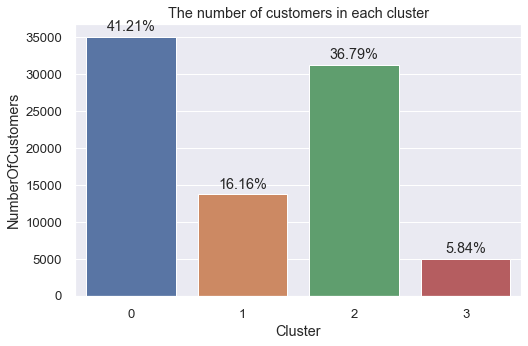

In [79]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Cluster',y='NumberOfCustomers',data=df.sort_values('Cluster',ascending=False))
total = sum(df['NumberOfCustomers'])

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('The number of customers in each cluster')
plt.savefig("The number of customers in each cluster.png")

### Cluster stability

In [228]:
my_clust4.cluster_centers_

array([[-1.78622863, -0.22887731, -0.07312517],
       [ 0.0638445 ,  3.78466805,  1.19885877],
       [ 0.37271537, -0.2315951 , -0.89097385],
       [ 0.3580036 , -0.2315951 ,  0.72518293]])

In [53]:
from sklearn import metrics
df = pd.DataFrame()
my_clust4 = KMeans(n_clusters=4, random_state=1)
my_clust4.fit(data_normalized)

for i in range(200):
    test = KMeans(n_clusters=4)
    test.fit_predict(data_normalized)
    ari = metrics.adjusted_rand_score(my_clust4.labels_, test.labels_)
    test = pd.DataFrame(test.cluster_centers_)
    test.columns = ['RecencyCor', 'FrequenceCor', 'MonetaryCor']
    test['Indice'] = i
    test['ARI'] = ari
    # Calcul du rand score qui doit etre proche de 1
    # car ils sont choisis aleatoirement
    df = pd.concat([df, test])

In [24]:
df.describe()

,RecencyCor,FrequenceCor,MonetaryCor,Indice,ARI
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.238970,1.450860,0.245808,99.500000,0.993282
std,0.861698,2.773261,0.722496,57.770423,0.002121
min,-1.708639,-0.149282,-0.843402,0.000000,0.990323
25%,-0.442019,-0.149282,-0.173151,49.750000,0.991846
50%,0.171294,-0.149282,0.387825,99.500000,0.992320
75%,0.378895,1.450860,0.805083,149.250000,0.994340
max,0.404123,6.251287,1.048878,199.000000,0.999244


In [25]:
df.head()

,RecencyCor,FrequenceCor,MonetaryCor,Indice,ARI
0,0.402666,-0.149282,0.718295,0,0.992005
1,-1.701057,-0.149282,0.057128,0,0.992005
2,-0.024385,6.251287,1.048878,0,0.992005
3,0.368261,-0.149282,-0.841490,0,0.992005
0,-1.706242,-0.149282,0.048691,1,0.998867


<AxesSubplot:>

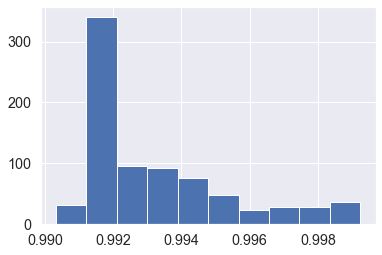

In [26]:
df['ARI'].hist()

In [ ]:
print('Le coefficient de silhouette kmeans pour le RFM est',metrics.silhouette_score(data_normalized,my_clust4.labels_))

In [ ]:
print('Le coefficient de davies bouldin kmeans pour le RFM est',metrics.davies_bouldin_score(data_normalized,my_clust4.labels_))
#un davies faible implique des clusters homogenes 

In [ ]:
my_clust4.inertia_
#fonction cout du modéle 
#somme des distances entre les points d'un cluster 
#et le centroide

#### Feature engineering

In [233]:
Olist_db.head()

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_value,customer_unique_id,zip_code_prefix_customer,order_item_id,customer_city,customer_state,order_purchase_date,order_delivered_customer_date,Durée_livraison,Montant_achat,Prix_Livraison,Prix_produit
0,b81ef226f3fe1789b1e8b2acac839d17,delivered,2018-04-25 22:01:49,79.80,19.53,99.33,708ab75d2a007f0564aedd11139c7708,39801,1,teofilo otoni,MG,20180425,2018-05-09 17:36:51,13,99.33,19.53,79.80
2,6a26bd1a037993f1205073dbeda67db4,delivered,2018-02-15 13:53:42,54.40,12.72,67.12,aca152a8bcfa7d7059b7787c67d60d52,13295,1,itupeva,SP,20180215,2018-03-02 22:29:04,15,67.12,12.72,54.40
3,1fce50c1831b6809773e5020edc716e2,delivered,2018-07-24 20:08:54,21.70,14.46,36.16,9aa679326b151fc564c2a238f361aa7d,5678,1,sao paulo,SP,20180724,2018-07-30 17:20:59,5,36.16,14.46,21.70
4,107f069fdb62a9cbe252b043323e4e32,delivered,2018-05-18 08:24:28,156.45,18.68,175.13,2acd1014f0a4e286b0896f30b67c1e80,79010,1,campo grande,MS,20180518,2018-06-12 18:18:45,25,175.13,18.68,156.45
5,5308fdab519f7478ef64894128fbbee4,delivered,2018-06-02 11:51:00,129.95,18.79,36.07,74fe4e106702770ef728399ce5da503a,74823,1,goiania,GO,20180602,2018-06-20 23:09:42,18,148.74,18.79,129.95


In [56]:
dataEtude=Olist_db.copy()

In [57]:
dataEtude['order_purchase_timestamp']=pd.to_datetime(dataEtude['order_purchase_timestamp'])

In [58]:
dataEtude['year']=dataEtude['order_purchase_timestamp'].dt.year

In [59]:
dataEtude['Date']=dataEtude['order_purchase_timestamp'].dt.strftime( "%Y-%m-%d")

In [60]:
dataEtude['Date']=pd.to_datetime(dataEtude['Date'])

In [61]:
dataEtude['Month_year']=dataEtude['order_purchase_timestamp'].dt.strftime( "%B-%Y")
#dataEtude['Mois_année']=pd.to_datetime(dataEtude['Mois_année'])

In [62]:
dataEtude['Month_year']

0             April-2018
1              June-2018
2          February-2018
3              July-2018
4               May-2018
               ...      
116575        March-2018
116576        March-2018
116577         June-2017
116579    September-2017
116580          May-2017
Name: Month_year, Length: 114032, dtype: object

In [241]:
dataEtude['Hour']=dataEtude['order_purchase_timestamp'].dt.hour

In [242]:
dataEtude['Hour'].describe()

count    83051.000000
mean        14.773428
std          5.359365
min          0.000000
25%         11.000000
50%         15.000000
75%         19.000000
max         23.000000
Name: Hour, dtype: float64

In [243]:
l=['October-2016','January-2017','February-2017','March-2017','April-2017','May-2017',\
 'June-2017','July-2017','August-2017','September-2017','October-2017','November-2017','December-2017',\
 'January-2018', 'February-2018','March-2018','April-2018','May-2018','June-2018','July-2018',\
  'August-2018']
#reindex permet de mettre dans l'ordre 
dataEtude['Month_year'].value_counts().reindex(l)

October-2016       237
January-2017       670
February-2017     1458
March-2017        2301
April-2017        2022
May-2017          3162
June-2017         2787
July-2017         3498
August-2017       3715
September-2017    3638
October-2017      3835
November-2017     6297
December-2017     4780
January-2018      6088
February-2018     5801
March-2018        5970
April-2018        5652
May-2018          5635
June-2018         5060
July-2018         5052
August-2018       5392
Name: Month_year, dtype: int64

In [66]:
df3=pd.DataFrame({'Month':dataEtude['Month_year'].value_counts().reindex(l).index,'Order':dataEtude['Month_year'].value_counts().reindex(l).values})

<AxesSubplot:xlabel='Order', ylabel='Month'>

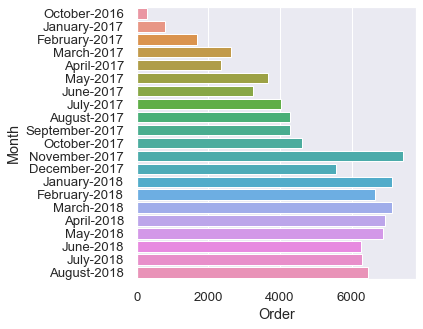

In [93]:
plt.figure(figsize=(5,5))
sns.barplot(y='Month',x='Order',data=df3)
#plt.title('Augmentation des ventes en novembre 2017')

Text(0.5, 1.0, 'Une augmentation des commandes en novembre 2017')

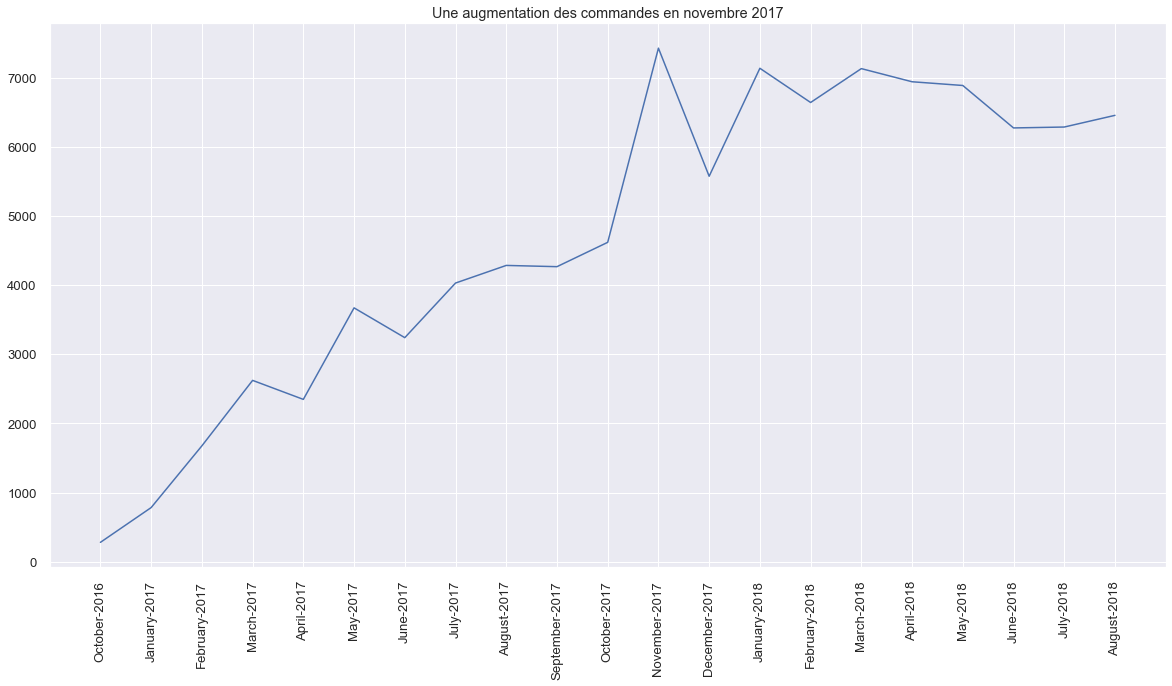

In [94]:
plt.figure(figsize=(20,10))
plt.plot(df3['Month'],df3['Order']);
plt.xticks(rotation=90);
plt.title('Order increasing')
#https://brazil-selection.com/lactu-bresil/2017/01/20/jours-feries-bresil/


In [330]:
rfmTable

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,1,141,6
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,1,4,4,144,9
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,2,442,10
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344,11
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,1,341,8
...,...,...,...,...,...,...,...,...,...
76687,fffb09418989a0dbff854a28163e47c6,256,1,73.16,3,4,3,343,10
76688,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58,3,4,3,343,10
76689,ffff371b4d645b6ecea244b27531430a,569,1,112.46,4,4,2,442,10
76690,ffff5962728ec6157033ef9805bacc48,120,1,133.69,2,4,2,242,8


### Temporal stability 

In [307]:
data=pd.merge(dataEtude,rfmTable,on='customer_unique_id')

In [308]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [255]:
i = (data['Month_year'] == 'June-2017') ^ (data['Month_year'] == 'July-2017')
jun_jul17 = data[i]
features = ['Recency', 'Frequency', 'Monetary']
index = jun_jul17.columns.isin(features)
dataModel_jun_jul17 = jun_jul17[jun_jul17.columns[index]]
# Standarisation
x_jun_jul17 = dataModel_jun_jul17.values
X_scaled_jun_jul17 = StandardScaler().fit_transform(x_jun_jul17)
# modele
model_jun_jul17 = KMeans(n_clusters=4)
model_jun_jul17.fit(X_scaled_jun_jul17)
# pred
pred_jun_jul17 = KMeans(n_clusters=4)
pred_jun_jul17.fit_predict(X_scaled_jun_jul17)
ARS_jun_jul17 = adjusted_rand_score(model_jun_jul17.labels_, pred_jun_jul17.labels_)

In [43]:
ARS_jun_jul17

0.9914442692286894

In [154]:
i = (data['Month_year'] == 'September-2017') ^ (data['Month_year'] == 'August-2017')
    
aug17_sep17 = data[i]
jun_sep17 = pd.merge(jun_jul17, aug17_sep17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_sep17.columns.isin(features)
dataModel_jun_sep17 = jun_sep17[jun_sep17.columns[index]]
# Standarisation
x_jun_sep17= dataModel_jun_sep17.values
X_scaled_jun_sep17 = StandardScaler().fit_transform(x_jun_sep17)
# modele
model_jun_sep17 = KMeans(n_clusters=4)
model_jun_sep17.fit(X_scaled_jun_sep17)
# pred
pred_jun_sep17 = KMeans(n_clusters=4)
pred_jun_sep17.fit_predict(X_scaled_jun_sep17)
ARS_jun_sep17 = adjusted_rand_score(model_jun_sep17.labels_, pred_jun_sep17.labels_)

In [155]:
i = (data['Month_year'] == 'October-2017') ^ (data['Month_year'] == 'November-2017')
    
oct17_nov17 = data[i]
jun_nov17 = pd.merge(jun_jul17, oct17_nov17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_nov17.columns.isin(features)
dataModel_jun_nov17 = jun_nov17[jun_nov17.columns[index]]
# Standarisation
x_jun_nov17= dataModel_jun_nov17.values
X_scaled_jun_nov17 = StandardScaler().fit_transform(x_jun_nov17)
# modele
model_jun_nov17 = KMeans(n_clusters=4)
model_jun_nov17.fit(X_scaled_jun_nov17)
# pred
pred_jun_nov17 = KMeans(n_clusters=4)
pred_jun_nov17.fit_predict(X_scaled_jun_nov17)
ARS_jun_nov17 = adjusted_rand_score(model_jun_nov17.labels_, pred_jun_nov17.labels_)

In [156]:
i = (data['Month_year'] == 'December-2017') ^ (data['Month_year'] == 'January-2018')
dec17_jan18 = data[i]
jun17_jan18 = pd.merge(jun_nov17, dec17_jan18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_jan18.columns.isin(features)
dataModel_jun17_jan18 = jun17_jan18[jun17_jan18.columns[index]]
# Standarisation
x_jun17_jan18= dataModel_jun17_jan18.values
X_scaled_jun17_jan18 = StandardScaler().fit_transform(x_jun17_jan18)
# modele
model_jun17_jan18 = KMeans(n_clusters=4)
model_jun17_jan18.fit(X_scaled_jun17_jan18)
# pred
pred_jun17_jan18 = KMeans(n_clusters=4)
pred_jun17_jan18.fit_predict(X_scaled_jun17_jan18)
ARS_jun17_jan18 = adjusted_rand_score(model_jun17_jan18.labels_, pred_jun17_jan18.labels_)

In [157]:
i = (data['Month_year'] == 'March-2018') ^ (data['Month_year'] == 'February-2018')
dec17_mar18 = data[i]
jun17_mar18 = pd.merge(jun17_jan18, dec17_mar18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_mar18.columns.isin(features)
dataModel_jun17_mar18 = jun17_mar18[jun17_mar18.columns[index]]
# Standarisation
x_jun17_mar18= dataModel_jun17_mar18.values
X_scaled_jun17_mar18 = StandardScaler().fit_transform(x_jun17_mar18)
# modele
model_jun17_mar18 = KMeans(n_clusters=4)
model_jun17_mar18.fit(X_scaled_jun17_mar18)
# pred
pred_jun17_mar18 = KMeans(n_clusters=4)
pred_jun17_mar18.fit_predict(X_scaled_jun17_mar18)
ARS_jun17_mar18 = adjusted_rand_score(model_jun17_mar18.labels_, pred_jun17_mar18.labels_)

In [158]:
i =  (data['Month_year'] == 'April-2018')^ (data['Month_year'] == 'May-2018')
apr18_may18 = data[i]
jun17_may18 = pd.merge(jun17_mar18, apr18_may18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_may18.columns.isin(features)
dataModel_jun17_may18 = jun17_may18[jun17_may18.columns[index]]
# Standarisation
x_jun17_may18= dataModel_jun17_may18.values
X_scaled_jun17_may18 = StandardScaler().fit_transform(x_jun17_may18)
# modele
model_jun17_may18 = KMeans(n_clusters=4)
model_jun17_may18.fit(X_scaled_jun17_may18)
# pred
pred_jun17_may18 = KMeans(n_clusters=4)
pred_jun17_may18.fit_predict(X_scaled_jun17_may18)
ARS_jun17_may18 = adjusted_rand_score(model_jun17_may18.labels_, pred_jun17_may18.labels_)

In [159]:
i = (data['Month_year'] == 'June-2018') ^ (data['Month_year'] == 'July-2018') 
jun18_aug18 = data[i]
jun17_aug18 = pd.merge(jun17_may18, jun18_aug18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_aug18.columns.isin(features)
dataModel_jun17_aug18 = jun17_aug18[jun17_aug18.columns[index]]
# Standarisation
x_jun17_aug18= dataModel_jun17_aug18.values
X_scaled_jun17_aug18 = StandardScaler().fit_transform(x_jun17_aug18)
# modele
model_jun17_aug18 = KMeans(n_clusters=4)
model_jun17_aug18.fit(X_scaled_jun17_aug18)
# pred
pred_jun17_aug18 = KMeans(n_clusters=4)
pred_jun17_aug18.fit_predict(X_scaled_jun17_aug18)
ARS_jun17_aug18 = adjusted_rand_score(model_jun17_aug18.labels_, pred_jun17_aug18.labels_)

In [185]:
sil5 = pd.DataFrame({'Period': ['2 months','4 months','6 months', '8 months', '10 months', '12 months','14 months'], 
                     'ARS': [ ARS_jun_jul17, ARS_jun_sep17, ARS_jun_nov17, ARS_jun17_jan18,
                             ARS_jun17_mar18, ARS_jun17_may18, ARS_jun17_aug18]})

In [186]:
sil5

,Period,ARS
0,2 months,1.000000
1,4 months,0.965044
2,6 months,0.996320
3,8 months,0.999745
4,10 months,0.996249
5,12 months,0.999431
6,14 months,0.999805


Text(0.5, 1.0, 'Temporal Staibility')

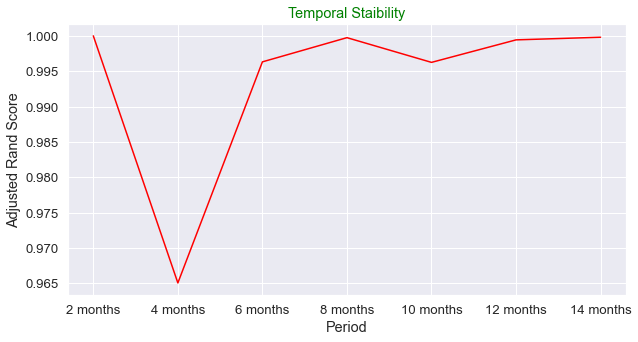

In [187]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
plt.plot(sil5['Period'], sil5['ARS'], c='red')

plt.xlabel('Period')
plt.ylabel('Adjusted Rand Score')
plt.title('Temporal Staibility', color='green')